<a href="https://colab.research.google.com/github/kpatwa153/gis/blob/main/map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cool, i love cdc brfss!

others oftentimes aggregate their data to counties for easy to use dataset eg:

https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation


can map other stuff like fast foods; why railway would be related to obesity? maybe like car use, walkability etc

You have the new health_data. You can deep dive state wise and use the health_data on that.

In [1]:
#Importing necessary libraries
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [2]:

#! pip install geopandas
!pip install mapclassify
!pip install mplcursors
import geopandas as gpd
import mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21168 sha256=57fc74e7ef31c9682afdc5e4ffdfd0c3ee3276bf480212dd44a84a49577ce718
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


In [3]:
!pip install openpyxl

## My Area of Interest
The dataset provides the percentage of Obesity across USA state wise. The data is obtained from the 2015 CDC BRFSS Survey. Reason behind the Obesity can later be found out by connecting it with data related to Walkability per state and the population density.

The data is present at data.gov site. Here is the link to view it online: https://catalog.data.gov/dataset/national-obesity-by-state-d765a

Link to download the file: https://data-lakecountyil.opendata.arcgis.com/datasets/lakecountyil::national-obesity-by-state.zip?outSR=%7B%22latestWkid%22%3A3435%2C%22wkid%22%3A102671%7D

The obesity dataset is further compared with the population density dataset

Population Density Dataset link: https://www.kff.org/other/state-indicator/distribution-by-age/?dataView=1&activeTab=map&currentTimeframe=5&selectedDistributions=children-0-18&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

Link to Dowload the dataset: https://www.kff.org/other/state-indicator/distribution-by-age/?dataView=1&activeTab=map&currentTimeframe=5&selectedDistributions=children-0-18&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D


2015 County Health Ranking Data: https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation/national-data-documentation-2010-2019

The above dataset provides the Ranking of the county of each state on various factors such as Food Environmental Index, Percentage of Obesity, Physical Inactivity, Access to excercise opportunity. Since these variables are related to obesity, I used this dataset to find the correlation with obesity.

## **PS0 Assignment**

In [4]:
# Install the gdown library if not already installed
!pip install gdown

import gdown
import zipfile

# Replace the 'drive_file_url' with the actual Google Drive link of the outer zip file
drive_file_url = 'https://drive.google.com/uc?export=download&id=1_Vo2cXguJ0FITPmodpwrAQ5f8Tr4BrnZ'

# Download the outer zip file
gdown.download(drive_file_url, 'Nevada_counties.zip', quiet=False)

#Extract the outer zip file
with zipfile.ZipFile('Nevada_counties.zip', 'r') as outer_zip:
    # Specify the directory where you want to extract the inner zip file and its contents
    # You can change 'extracted' to your desired directory.
    outer_zip.extractall('extracted')

#Extract the inner zip file (inside the 'extracted' directory)
inner_zip_path = 'extracted/united_states_nevada_administrative_boundaries_level6_counties_polygon.zip'
with zipfile.ZipFile(inner_zip_path, 'r') as inner_zip:
    # Specify the directory where you want to extract the inner zip file's contents
    # You can change 'inner_extracted' to your desired directory.
    inner_zip.extractall('inner_extracted')

Downloading...
From: https://drive.google.com/uc?export=download&id=1_Vo2cXguJ0FITPmodpwrAQ5f8Tr4BrnZ
To: /content/Nevada_counties.zip
100%|██████████| 74.5k/74.5k [00:00<00:00, 58.1MB/s]


'Nevada_counties.zip'

In [5]:
#importing the data
! wget -q -O us_map.zip https://drive.google.com/uc?id=1hFpTOmjP-Ti7JAEZfD0V3mRtF5siqS5Q&export=download

zip_ref = zipfile.ZipFile('us_map.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping


In [6]:
#Reading the shapefile data under obs object
obs=gpd.read_file('National_Obesity_By_State.shp')

<Axes: >

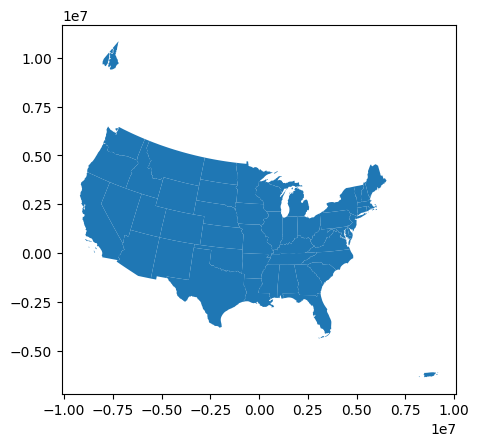

In [7]:
#make the map
obs.plot()

In [8]:
#Finding the data type of all the columns of the dataset
obs.dtypes

FID              int64
NAME            object
Obesity        float64
SHAPE_Leng     float64
SHAPE_Area     float64
geometry      geometry
dtype: object

# Exploratory Data Analysis

In [9]:
#Using the describe function
obs.describe().round(2) #aok: good, yes do use it

,FID,Obesity,SHAPE_Leng,SHAPE_Area
count,52.00,52.00,52.00,5.200000e+01
mean,26.50,29.29,6294281.64,1.724137e+12
std,15.15,3.83,3068680.70,1.455130e+12
min,1.00,20.20,0.00,0.000000e+00
25%,13.75,26.25,5022132.32,8.299946e+11
50%,26.50,29.80,6445437.64,1.492228e+12
75%,39.25,31.48,7747382.82,2.245753e+12
max,52.00,36.20,15408321.87,7.672329e+12


<Axes: >

[]

[]

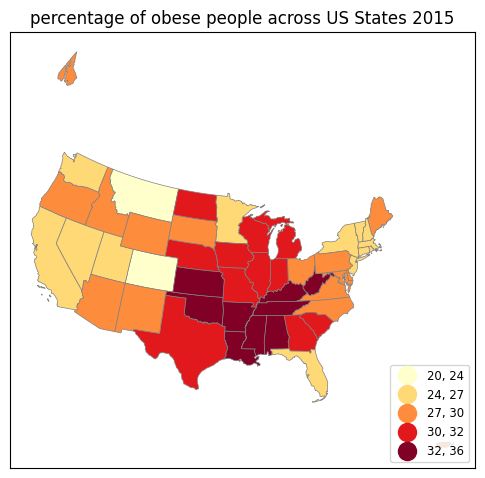

In [10]:
fig, ax = plt.subplots(1, figsize=(6,10))
obs.plot(ax=ax,column='Obesity',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("percentage of obese people across US States 2015")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


# **PS 1** **Assignment**

In [11]:
! wget -q -O population_distribution_by_age_number_2015.csv "https://drive.google.com/uc?export=download&id=1UGWwj7_AY0FuCp04ICaqCNII-FYh_dlh"
population_density = pd.read_csv("population_distribution_by_age_number_2015.csv")
population_density

,Location,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total,Footnotes
0,United States,76080400.0,28950400.0,37990300.0,82829900.0,40508000.0,46418900.0,312777900.0,1.0
1,Alabama,1150500.0,424900.0,544800.0,1232300.0,631600.0,746000.0,4730100.0,NaN
2,Alaska,191500.0,78800.0,96300.0,177800.0,92400.0,70800.0,707500.0,NaN
3,Arizona,1672500.0,631300.0,779700.0,1661800.0,804400.0,1105300.0,6655100.0,NaN
4,Arkansas,721000.0,259900.0,334700.0,738300.0,369900.0,458600.0,2882300.0,NaN
...,...,...,...,...,...,...,...,...,...
64,KFF estimates based on the 2008-2021 American ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Footnotes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df2 = population_density.drop(['Footnotes'],axis = 1)
df2

,Location,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total
0,United States,76080400.0,28950400.0,37990300.0,82829900.0,40508000.0,46418900.0,312777900.0
1,Alabama,1150500.0,424900.0,544800.0,1232300.0,631600.0,746000.0,4730100.0
2,Alaska,191500.0,78800.0,96300.0,177800.0,92400.0,70800.0,707500.0
3,Arizona,1672500.0,631300.0,779700.0,1661800.0,804400.0,1105300.0,6655100.0
4,Arkansas,721000.0,259900.0,334700.0,738300.0,369900.0,458600.0,2882300.0
...,...,...,...,...,...,...,...,...
64,KFF estimates based on the 2008-2021 American ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Footnotes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
rows_to_drop = list(range(53,69))
df2 = df2.drop(rows_to_drop,axis = 0)


In [14]:
df2['percentage_us_population_per_state'] = (df2['Total'] / df2.loc[0,'Total']) * 100
df2['percentage_us_population_per_state'] = round(df2['percentage_us_population_per_state'],2)
df2

,Location,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total,percentage_us_population_per_state
0,United States,76080400.0,28950400.0,37990300.0,82829900.0,40508000.0,46418900.0,312777900.0,100.00
1,Alabama,1150500.0,424900.0,544800.0,1232300.0,631600.0,746000.0,4730100.0,1.51
2,Alaska,191500.0,78800.0,96300.0,177800.0,92400.0,70800.0,707500.0,0.23
3,Arizona,1672500.0,631300.0,779700.0,1661800.0,804400.0,1105300.0,6655100.0,2.13
4,Arkansas,721000.0,259900.0,334700.0,738300.0,369900.0,458600.0,2882300.0,0.92
5,California,9438000.0,3816900.0,5070900.0,10311100.0,4590600.0,5097700.0,38325100.0,12.25
6,Colorado,1301000.0,496000.0,723500.0,1421700.0,678500.0,694700.0,5315400.0,1.70
7,Connecticut,794900.0,304000.0,376100.0,966000.0,493400.0,543700.0,3478100.0,1.11
8,Delaware,211700.0,82200.0,105700.0,236900.0,126300.0,155500.0,918300.0,0.29
9,District of Columbia,120100.0,66300.0,134800.0,171400.0,70600.0,71600.0,634800.0,0.20


In [15]:
obs.rename(columns = {'NAME':'Location'},inplace=True)

In [16]:
merged_data = df2.merge(obs,on = 'Location',how='left')
merged_data['Obesity By Number'] = (merged_data['Total'] * merged_data['Obesity'])/100
merged_data['Obesity By Number'] = round(merged_data['Obesity By Number'],2)

In [17]:
merged_data[['Location','Total']]

,Location,Total
0,United States,312777900.0
1,Alabama,4730100.0
2,Alaska,707500.0
3,Arizona,6655100.0
4,Arkansas,2882300.0
5,California,38325100.0
6,Colorado,5315400.0
7,Connecticut,3478100.0
8,Delaware,918300.0
9,District of Columbia,634800.0


In [18]:
merged_data['Obesity_per_state'] = round((merged_data['Obesity By Number'] * 100 / df2.loc[0,'Total']),2)
merged_data.describe()

,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total,percentage_us_population_per_state,FID,Obesity,SHAPE_Leng,SHAPE_Area,Obesity By Number,Obesity_per_state
count,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,53.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,52.000000
mean,2.885836e+06,1.098958e+06,1.440511e+06,3.142577e+06,1.536694e+06,1.763334e+06,1.186791e+07,3.793962,26.500000,29.286538,6.294282e+06,1.724137e+12,1.754854e+06,0.560769
std,1.039015e+07,3.955786e+06,5.193199e+06,1.130903e+07,5.521108e+06,6.328178e+06,4.269083e+07,13.648920,15.154757,3.832832,3.068681e+06,1.455130e+12,1.894171e+06,0.606174
min,1.201000e+05,4.980000e+04,6.790000e+04,1.390000e+05,7.060000e+04,7.080000e+04,5.689000e+05,0.180000,1.000000,20.200000,0.000000e+00,0.000000e+00,1.402908e+05,0.040000
25%,4.462000e+05,1.543000e+05,1.863000e+05,4.579000e+05,2.364000e+05,2.679000e+05,1.791500e+06,0.570000,13.750000,26.250000,5.022132e+06,8.299946e+11,5.485730e+05,0.172500
50%,1.037500e+06,3.857000e+05,4.883000e+05,1.142800e+06,5.843000e+05,6.514000e+05,4.283400e+06,1.370000,26.500000,29.800000,6.445438e+06,1.492228e+12,1.235616e+06,0.395000
75%,1.672500e+06,6.343000e+05,9.125000e+05,1.857300e+06,9.254000e+05,1.105300e+06,7.002800e+06,2.240000,39.250000,31.475000,7.747383e+06,2.245753e+12,2.048671e+06,0.652500
max,7.608040e+07,2.895040e+07,3.799030e+07,8.282990e+07,4.050800e+07,4.641890e+07,3.127779e+08,100.000000,52.000000,36.200000,1.540832e+07,7.672329e+12,9.274674e+06,2.970000


In [19]:
population = merged_data[['Children 0-18','Adults 19-25','Adults 26-34','Adults 35-54','Adults 55-64','65+','geometry','Location']]
population['Adults'] = population['Adults 19-25'] + population['Adults 26-34'] + population['Adults 35-54'] + population['Adults 55-64']
del population['Adults 19-25']
del population['Adults 26-34']
del population['Adults 35-54']
del population['Adults 55-64']
population.dtypes

<ipython-input-19-b371281df9d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['Adults'] = population['Adults 19-25'] + population['Adults 26-34'] + population['Adults 35-54'] + population['Adults 55-64']


Children 0-18     float64
65+               float64
geometry         geometry
Location           object
Adults            float64
dtype: object

aok: what is pop dens??? and your top cat 9-76m does not appear on the map

<Axes: >

[]

[]

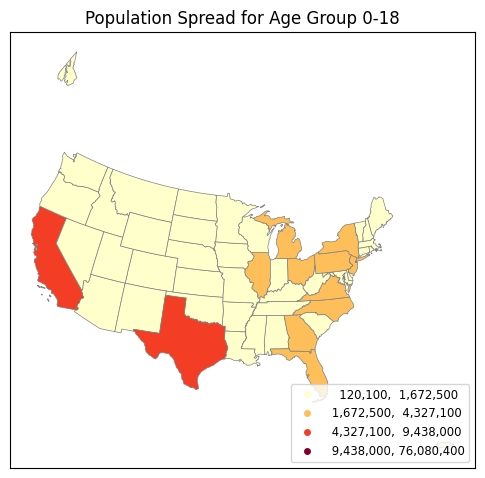

In [20]:
gdp = gpd.GeoDataFrame(population,geometry = 'geometry')
fig, ax = plt.subplots(1, figsize=(6,10))
gdp.plot(ax=ax,column='Children 0-18',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=4,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.00f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':0.5}) #
ax.title.set_text("Population Spread for Age Group 0-18")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


<Axes: >

[]

[]

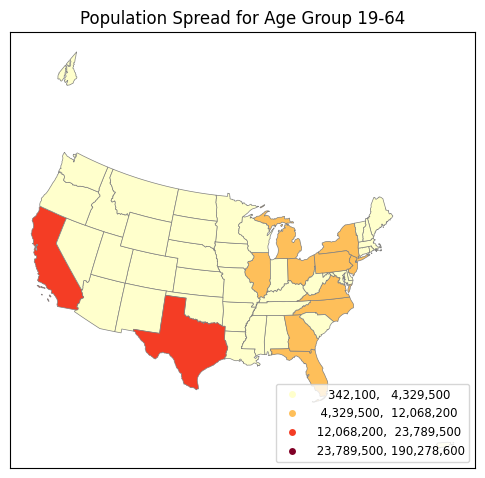

In [21]:
fig, ax = plt.subplots(1, figsize=(6,10))
gdp.plot(ax=ax,column='Adults',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=4,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.00f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':0.5}) #
ax.title.set_text("Population Spread for Age Group 19-64")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

<Axes: >

[]

[]

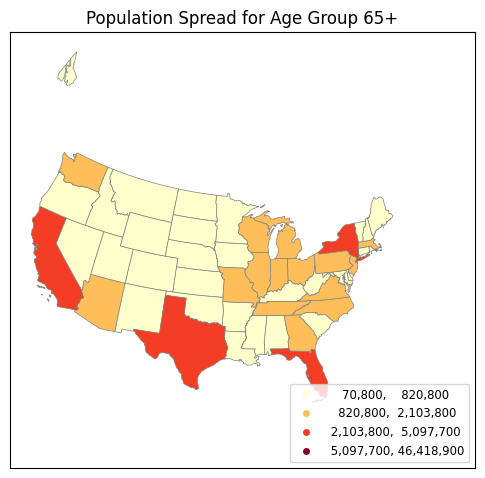

In [22]:
fig, ax = plt.subplots(1, figsize=(6,10))
gdp.plot(ax=ax,column='65+',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=4,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.00f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':0.5}) #

ax.title.set_text("Population Spread for Age Group 65+")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


In [23]:
#df2 = df2.drop([0],axis = 0)
#df2

In [24]:
gdf = gpd.GeoDataFrame(merged_data,geometry = 'geometry')

percentage of obese people across US States 2015 in comparison with total population of US--what is it? like 1st map was showing like 10-35perc, why here so different??? doesnt make sense

<Axes: >

[]

[]

<Axes: >

[]

[]

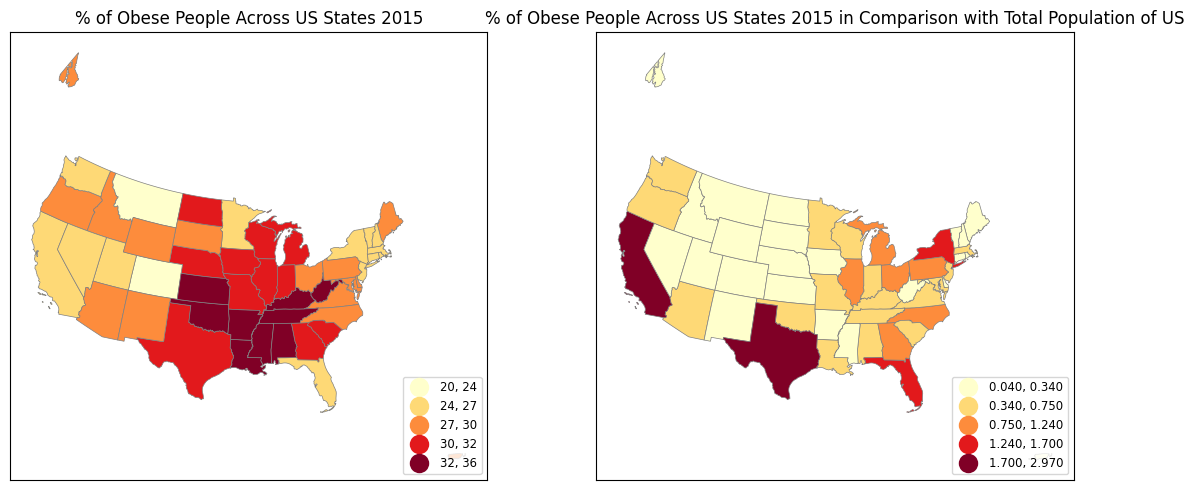

In [25]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first map on the first subplot (axes[0])
obs.plot(ax=axes[0], column='Obesity', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
         edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.0f}",
        'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})
axes[0].title.set_text("% of Obese People Across US States 2015")
axes[0].set_xticks([])
axes[0].set_yticks([])

# Plot the second map on the second subplot (axes[1])
gdf.plot(ax=axes[1], column='Obesity_per_state', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
         edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.3f}",
        'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})
axes[1].title.set_text("% of Obese People Across US States 2015 in Comparison with Total Population of US")
axes[1].set_xticks([])
axes[1].set_yticks([])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [26]:
merged = merged_data[merged_data['Location']!='United States']

<Axes: >

[]

[]

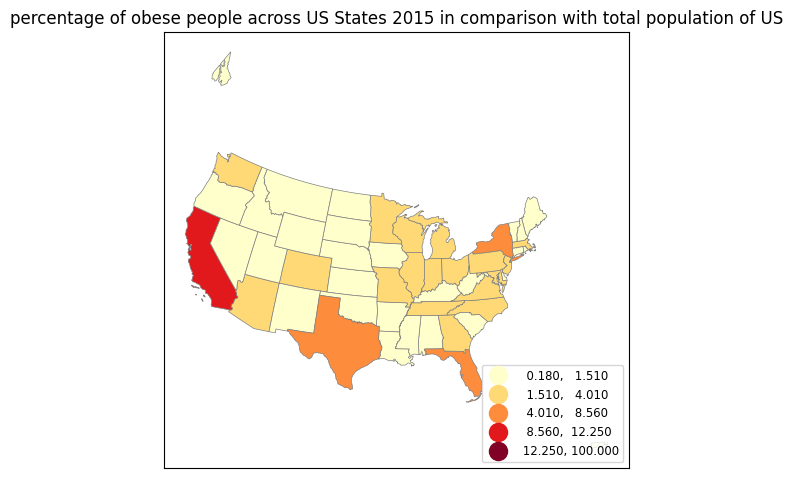

In [27]:
fig, ax = plt.subplots(1, figsize=(6,10))
gdf.plot(ax=ax,column='percentage_us_population_per_state',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.3f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("percentage of obese people across US States 2015 in comparison with total population of US")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


In [28]:
merged.dtypes

Location                                object
Children 0-18                          float64
Adults 19-25                           float64
Adults 26-34                           float64
Adults 35-54                           float64
Adults 55-64                           float64
65+                                    float64
Total                                  float64
percentage_us_population_per_state     float64
FID                                    float64
Obesity                                float64
SHAPE_Leng                             float64
SHAPE_Area                             float64
geometry                              geometry
Obesity By Number                      float64
Obesity_per_state                      float64
dtype: object

# PS2 Assignment

aok:

nice to start with big picture and then zoom in onto a county

nice hashing too for exception cases

In [29]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from google.colab import data_table
data_table.enable_dataframe_formatter()
from matplotlib.lines import Line2D
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib.lines import Line2D
from matplotlib.cm import ScalarMappable
import geopandas as gpd


!pip install mapclassify
import mapclassify

! pip install contextily
import contextily as cx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 57.5 MB/s eta 0:00:00


In [30]:
! wget -q -O health_data.xls "https://drive.google.com/uc?export=download&id=1nrmuqwrWkZ7-AnfjZQOxgYri6QMQHQE9"
health_data = pd.read_excel('health_data.xls',sheet_name = 'Ranked Measure Data',header = [0,1],engine = 'xlrd')
health_data.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Premature death  \
                FIPS              State             County        # Deaths   
0             1001.0            Alabama            Autauga           754.0   
1             1003.0            Alabama            Baldwin          2460.0   
2             1005.0            Alabama            Barbour           414.0   
3             1007.0            Alabama               Bibb           407.0   
4             1009.0            Alabama             Blount           861.0   

                                                                         \
  Years of Potential Life Lost Rate 95% CI - Low 95% CI - High Quartile   
0                           8405.21     7553.786      9256.634        1   
1                           7456.89     7005.698      7908.082        1   
2                           8900.51     7579.705     10221.315        1   
3                          10729.22     9124.254     12334.186        3   
4                           8668.52     7801.514      9535.526        1   

  Poor or fair health              ... Driving alone to work                \
          Sample Size % Fair/Poor  ...             # Workers % Drive Alone   
0               407.0        22.8  ...               24144.0     88.518887   
1              1664.0        12.7  ...               80619.0     83.694911   
2               423.0        23.4  ...                9163.0     82.200153   
3               379.0        17.9  ...                7845.0     83.212237   
4               367.0        24.2  ...               22580.0     83.330381   

                                      Long commute - driving alone  \
  95% CI - Low 95% CI - High Quartile    # Workers who Drive Alone   
0    86.505618     90.532156        4                      21372.0   
1    82.004780     85.385041        2                      67474.0   
2    81.248013     83.152292        1                       7532.0   
3    80.596411     85.828064        2                       6528.0   
4    80.753920     85.906842        2                      18816.0   

                                                                     
  % Long Commute - Drives Alone 95% CI - Low 95% CI - High Quartile  
0                          42.0    38.177937     45.822063        3  
1                          34.9    32.778614     37.021386        3  
2                          33.1    27.946206     38.253794        2  
3                          47.5    39.963418     55.036582        4  
4                          58.4    53.666922     63.133078        4  

[5 rows x 161 columns]

In [31]:
health_data.columns = ['_'.join(col).strip() for col in health_data.columns.values]
health_data = health_data.rename(columns = {'Unnamed: 0_level_0_FIPS': 'FIPS', 'Unnamed: 1_level_0_State':'State','Unnamed: 2_level_0_County':'County'})
health_data.columns

Index(['FIPS', 'State', 'County', 'Premature death_# Deaths',
       'Premature death_Years of Potential Life Lost Rate',
       'Premature death_95% CI - Low', 'Premature death_95% CI - High',
       'Premature death_Quartile', 'Poor or fair health_Sample Size',
       'Poor or fair health_% Fair/Poor',
       ...
       'Driving alone to work_# Workers',
       'Driving alone to work_% Drive Alone',
       'Driving alone to work_95% CI - Low',
       'Driving alone to work_95% CI - High', 'Driving alone to work_Quartile',
       'Long commute - driving alone_# Workers who Drive Alone',
       'Long commute - driving alone_% Long Commute - Drives Alone',
       'Long commute - driving alone_95% CI - Low',
       'Long commute - driving alone_95% CI - High',
       'Long commute - driving alone_Quartile'],
      dtype='object', length=161)

In [32]:
health_data.head()

,FIPS,State,County,Premature death_# Deaths,Premature death_Years of Potential Life Lost Rate,Premature death_95% CI - Low,Premature death_95% CI - High,Premature death_Quartile,Poor or fair health_Sample Size,Poor or fair health_% Fair/Poor,...,Driving alone to work_# Workers,Driving alone to work_% Drive Alone,Driving alone to work_95% CI - Low,Driving alone to work_95% CI - High,Driving alone to work_Quartile,Long commute - driving alone_# Workers who Drive Alone,Long commute - driving alone_% Long Commute - Drives Alone,Long commute - driving alone_95% CI - Low,Long commute - driving alone_95% CI - High,Long commute - driving alone_Quartile
0,1001.0,Alabama,Autauga,754.0,8405.21,7553.786,9256.634,1,407.0,22.8,...,24144.0,88.518887,86.505618,90.532156,4,21372.0,42.0,38.177937,45.822063,3
1,1003.0,Alabama,Baldwin,2460.0,7456.89,7005.698,7908.082,1,1664.0,12.7,...,80619.0,83.694911,82.004780,85.385041,2,67474.0,34.9,32.778614,37.021386,3
2,1005.0,Alabama,Barbour,414.0,8900.51,7579.705,10221.315,1,423.0,23.4,...,9163.0,82.200153,81.248013,83.152292,1,7532.0,33.1,27.946206,38.253794,2
3,1007.0,Alabama,Bibb,407.0,10729.22,9124.254,12334.186,3,379.0,17.9,...,7845.0,83.212237,80.596411,85.828064,2,6528.0,47.5,39.963418,55.036582,4
4,1009.0,Alabama,Blount,861.0,8668.52,7801.514,9535.526,1,367.0,24.2,...,22580.0,83.330381,80.753920,85.906842,2,18816.0,58.4,53.666922,63.133078,4


In [33]:
! wget -q -O california.zip "https://drive.google.com/uc?export=download&id=1wb9BP3pg17a7bPBZm61fwHTSn_09PThC"
zip_ref = zipfile.ZipFile('california.zip', 'r'); zip_ref.extractall(); zip_ref.close()

<Axes: >

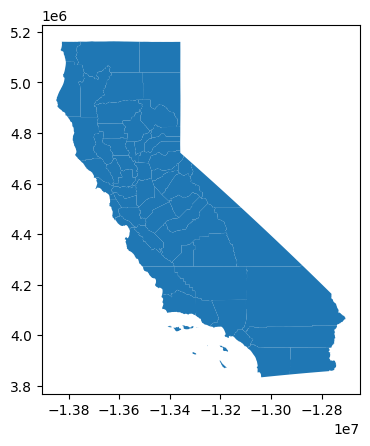

In [34]:
cal_shp = gpd.read_file("/content/cnty19_1.shp")
cal_shp.plot()

In [35]:
cal_shp.dtypes
cal_shp = cal_shp.rename(columns = {'COUNTY_NAM':'County'})

OBJECTID         int64
COUNTY_NAM      object
COUNTY_ABB      object
COUNTY_NUM       int64
COUNTY_COD      object
COUNTY_FIP      object
ISLAND          object
GlobalID        object
SHAPE_Leng     float64
SHAPE_Area     float64
geometry      geometry
dtype: object

In [36]:
cal_data = health_data[health_data['State'] == 'California']
cal_data = cal_data[['State','County','Adult smoking_% Smokers','Adult obesity_% Obese','Food environment index_Food Environment Index','Physical inactivity_% Physically Inactive','Access to exercise opportunities_% With Access']]

In [37]:
cal_data.head()

,State,County,Adult smoking_% Smokers,Adult obesity_% Obese,Food environment index_Food Environment Index,Physical inactivity_% Physically Inactive,Access to exercise opportunities_% With Access
184,California,Alameda,10.6,20.5,7.6,15.0,99.731240
185,California,Alpine,NaN,23.5,6.5,17.7,100.000000
186,California,Amador,21.2,24.8,7.7,17.2,68.995301
187,California,Butte,19.2,24.4,6.4,16.9,84.039091
188,California,Calaveras,19.1,24.3,7.7,17.6,62.806617


In [38]:
cal_data = cal_data.merge(cal_shp[['County','geometry']],on = 'County',how = 'left')

In [39]:
cal_data_copy  = cal_data.copy()
del cal_data_copy['geometry']

In [40]:
cal_datac = gpd.GeoDataFrame(cal_data,geometry = 'geometry')
cal_data = gpd.GeoDataFrame(cal_data,geometry = 'geometry')

<Axes: >

[]

[]

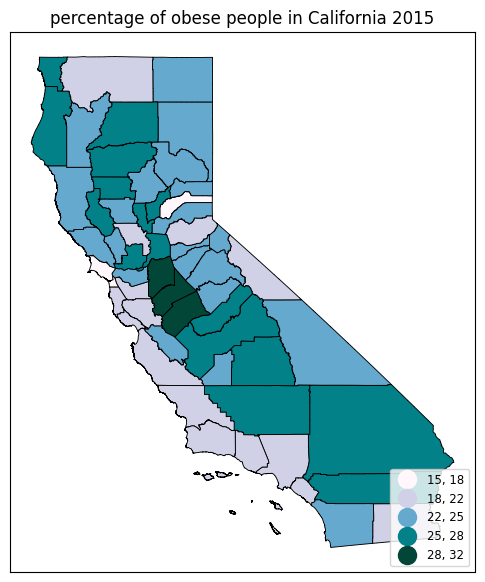

In [41]:
fig, ax = plt.subplots(1, figsize=(6,10))
cal_datac.plot(ax=ax,column='Adult obesity_% Obese',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=0.65,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("percentage of obese people in California 2015")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


In [42]:
cal_datac['geometry'] = cal_datac['geometry'].centroid

<Axes: >

<Axes: >

[]

[]

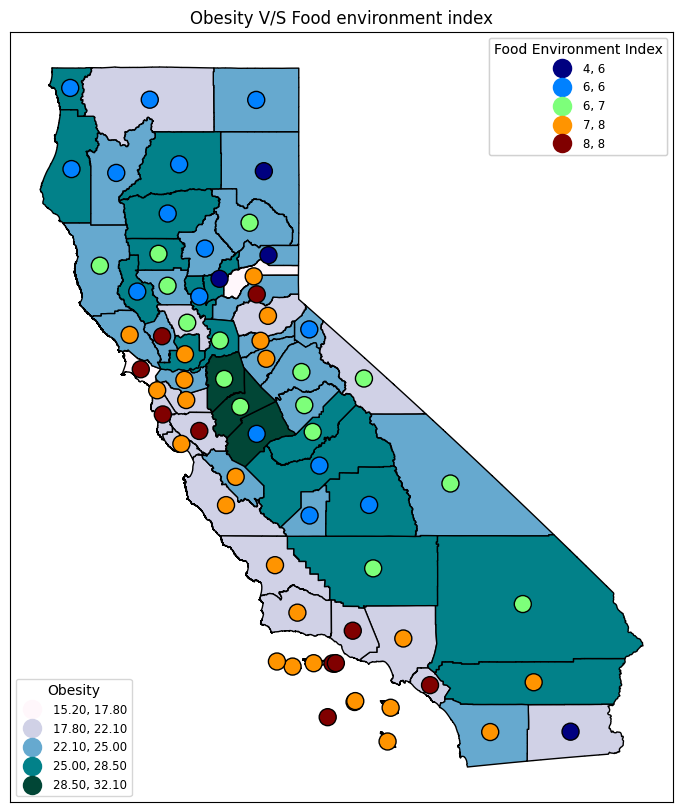

In [43]:
fig, ax = plt.subplots(1, figsize=(12,10))

cal_data.plot(ax=ax,column='Adult obesity_% Obese',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Obesity''')

cal_datac.plot(ax=ax,column='Food environment index_Food Environment Index',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 150)

ax.title.set_text("Obesity V/S Food environment index")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Food Environment Index''')



ax.add_artist(l2)
ax.add_artist(l1)

From this map, we can say that Merced and Yuba has the poor food environment index and highest obesity

Placer and Solano has obesity percentage of 22.10 - 25.00 but its food environment index is very high.

aok: ok cool can do scatterplot too




<Axes: >

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Obesity V/S Food Environment Index')

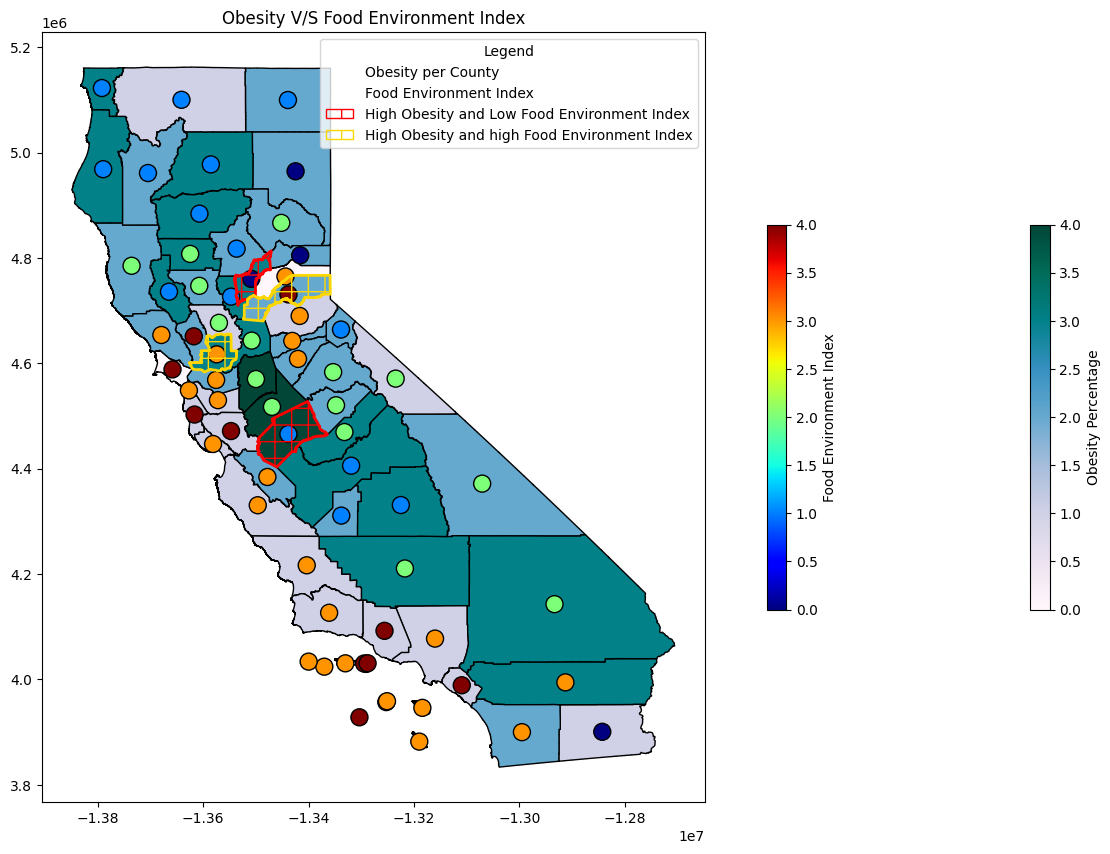

In [44]:
import matplotlib.patches as mpatches

cal_datac_q = cal_data.query("County=='Merced' | County=='Yuba'")
cal_datac_e = cal_data.query("County=='Placer' | County=='Solano'")

fig, ax = plt.subplots(1,figsize=(20, 10))

cal_data.plot(ax=ax,column='Adult obesity_% Obese',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
cal_datac.plot(ax=ax,column='Food environment index_Food Environment Index',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 150)
cal_datac_q.plot(ax=ax, edgecolor='red', linewidth=2, facecolor="none", alpha=1, hatch='+')
cal_datac_e.plot(ax=ax, edgecolor='gold', linewidth=2, facecolor="none", alpha=1, hatch='+')

legend_elements1 = [
    mpatches.Patch(color='none', label='Obesity per County'),
    mpatches.Patch(color='none', label='Food Environment Index'),
]
legend_elements1.append(mpatches.Patch(edgecolor='red', facecolor='none', hatch='+',
                                      label="High Obesity and Low Food Environment Index"))
legend_elements1.append(mpatches.Patch(edgecolor='gold', facecolor='none', hatch='+',
                                      label="High Obesity and high Food Environment Index"))

ax.set_title('Obesity V/S Food Environment Index')

ax.legend(handles=legend_elements1, loc='upper right', title="Legend")

cbar_obesity = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', shrink=0.5)
cbar_obesity.set_label("Obesity Percentage")

cbar_fei = plt.colorbar(ax.collections[1], ax=ax, orientation='vertical', shrink=0.5)
cbar_fei.set_label("Food Environment Index")


aok: nice map, but obesity percentage scale is differenct from earlier, here max is 4, which looks like a mistake

<Axes: >

<Axes: >

<Axes: >

<Axes: >

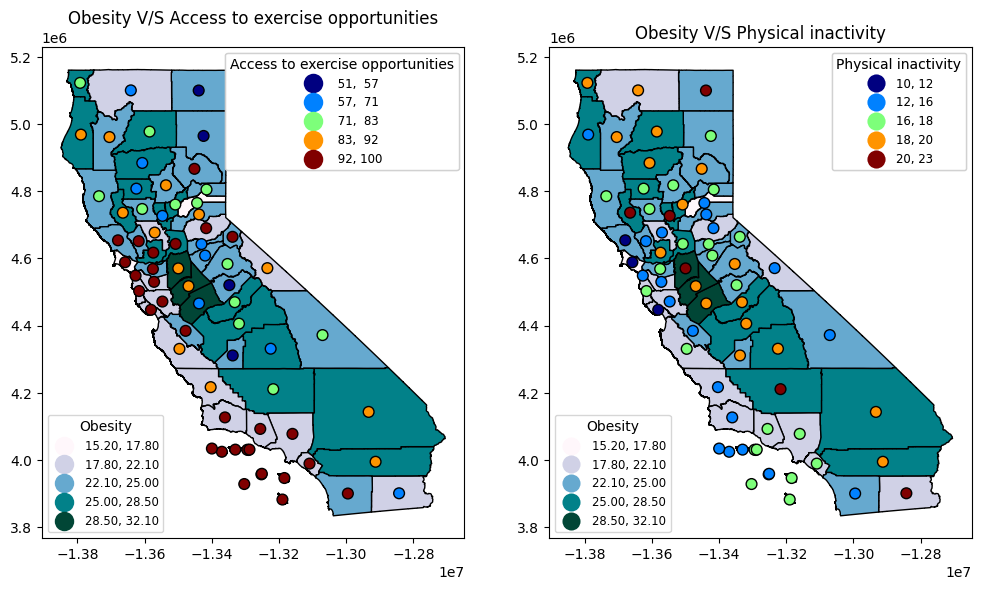

In [45]:
fig, ax = plt.subplots(1,2, figsize=(12,10))

cal_data.plot(ax=ax[0],column='Adult obesity_% Obese',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax[0].get_legend()
l1.set_title('''Obesity''')

cal_datac.plot(ax=ax[0],column='Access to exercise opportunities_% With Access',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 60)

ax[0].title.set_text("Obesity V/S Access to exercise opportunities")
#ax.set_xticks([]); ax.set_yticks([])

l2 = ax[0].get_legend()
l2.set_title('''Access to exercise opportunities''')



ax[0].add_artist(l2)
ax[0].add_artist(l1)

#Second Map
cal_data.plot(ax=ax[1],column='Adult obesity_% Obese',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.3})

l1 = ax[1].get_legend()
l1.set_title('''Obesity''')

cal_datac.plot(ax=ax[1],column='Physical inactivity_% Physically Inactive',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.3},
         markersize = 60)

ax[1].title.set_text("Obesity V/S Physical inactivity")
#ax.set_xticks([]); ax.set_yticks([])

l2 = ax[1].get_legend()
l2.set_title('''Physical inactivity''')



ax[1].add_artist(l2)
ax[1].add_artist(l1)

High Obesity and Low access to excercise opportunities: Merced, Tehama and Glenn

High Obesity and High Access to excercise opportunities: San Joaquin, Stanislaus, Sacramento

High Obesity and High Physical Inactivity: Merced, San Joaquin, Sacramento

High Obesity and low Physical Inactivity: Siskiyou, Imperial

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

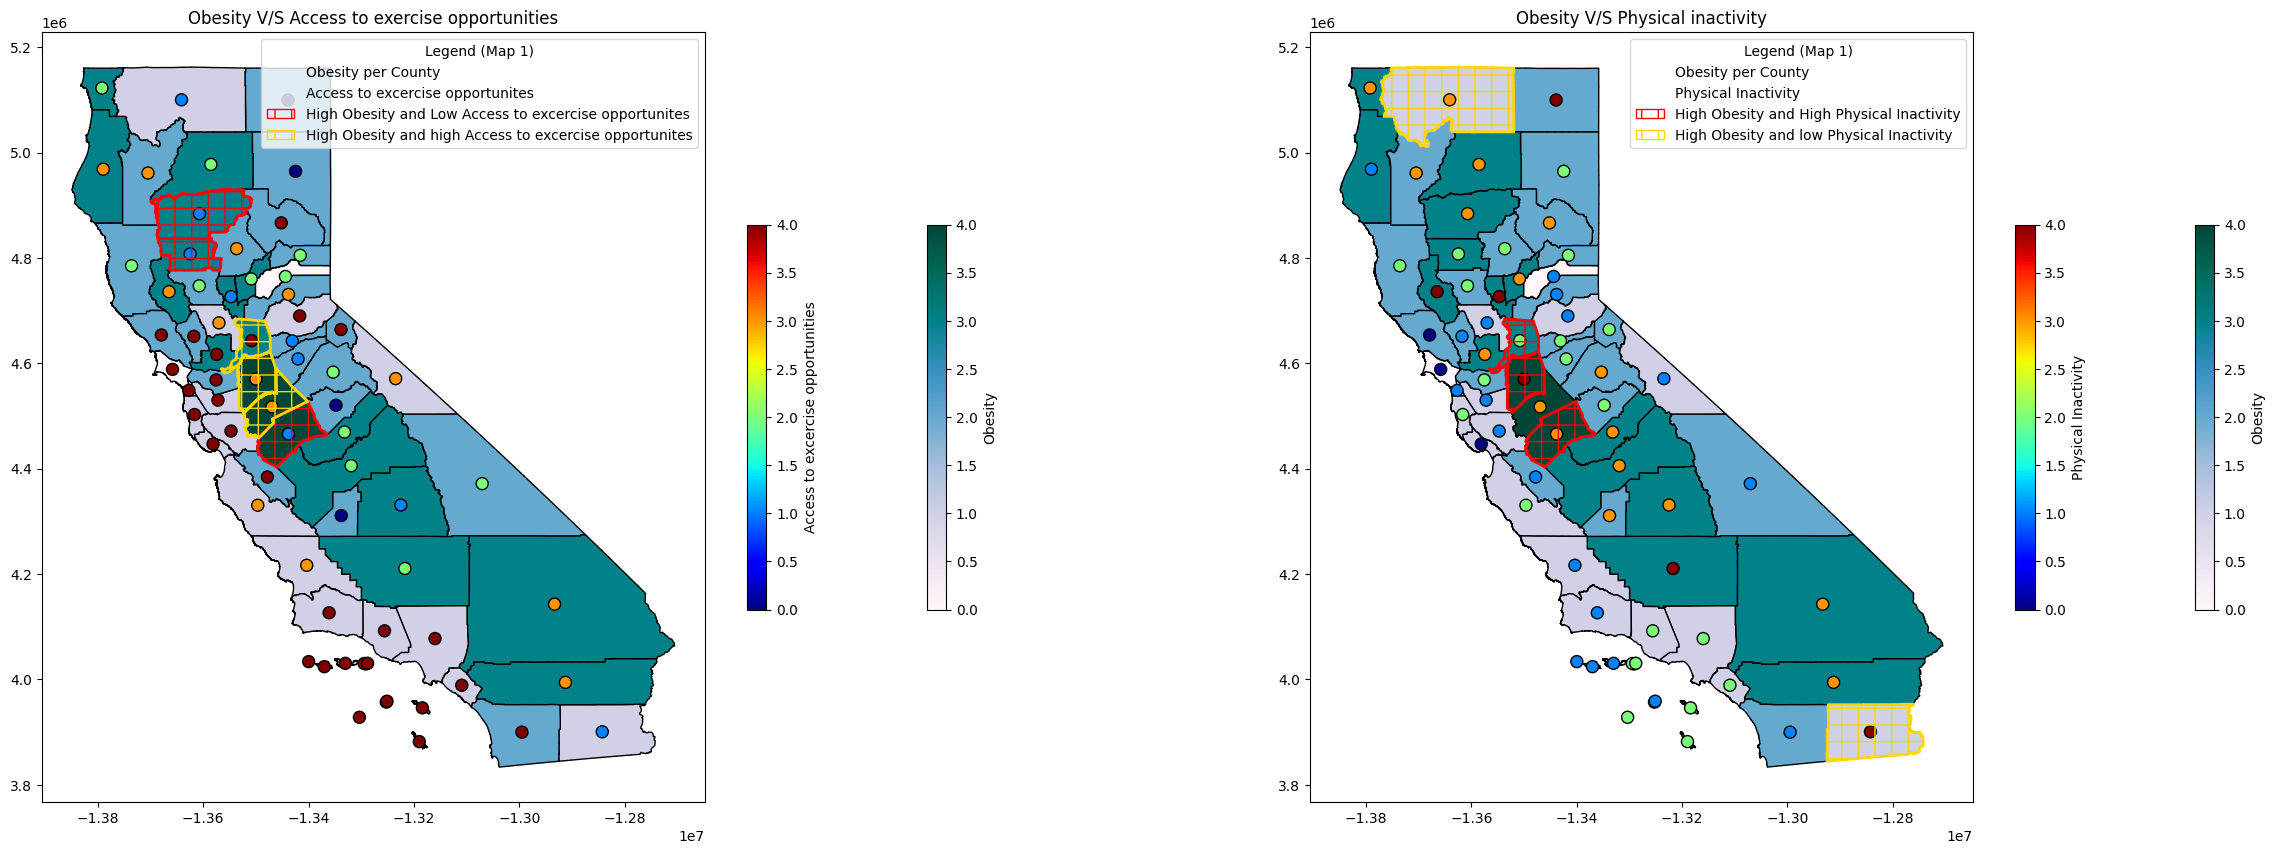

In [46]:
fig, ax = plt.subplots(1,2, figsize=(30,10))

#first map
cal_datac_q = cal_data.query("County=='Merced' | County=='Tehama' | County=='Glenn' ")
cal_datac_e = cal_data.query("County=='San Joaquin' | County=='Stanislaus' | County=='Sacramento' ")
cal_data.plot(ax=ax[0],column='Adult obesity_% Obese',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

#l1 = ax[0].get_legend()
#l1.set_title('''Obesity''')

cal_datac.plot(ax=ax[0],column='Access to exercise opportunities_% With Access',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 75)
cal_datac_q.plot(ax=ax[0], edgecolor='red', linewidth=2, facecolor="none", alpha=1, hatch='+')
cal_datac_e.plot(ax=ax[0], edgecolor='gold', linewidth=2, facecolor="none", alpha=1, hatch='+')
legend_elements1 = [
    mpatches.Patch(color='none', label='Obesity per County'),
    mpatches.Patch(color='none', label='Access to excercise opportunites'),
]
legend_elements1.append(mpatches.Patch(edgecolor='red', facecolor='none', hatch='+',
                                      label="High Obesity and Low Access to excercise opportunites"))
legend_elements1.append(mpatches.Patch(edgecolor='gold', facecolor='none', hatch='+',
                                      label="High Obesity and high Access to excercise opportunites"))
ax[0].legend(handles=legend_elements1, loc='upper right', title="Legend (Map 1)")
ax[0].title.set_text("Obesity V/S Access to exercise opportunities")
#ax.set_xticks([]); ax.set_yticks([])

#l2 = ax[0].get_legend()
#l2.set_title('''Access to exercise opportunities''')



#ax[0].add_artist(l2)
#ax[0].add_artist(l1)

#Second Map
cal_datac_q = cal_data.query("County=='Merced' | County=='San Joaquin' | County=='Sacramento' ")
cal_datac_e = cal_data.query("County=='Siskiyou' | County=='Imperial'")
cal_data.plot(ax=ax[1],column='Adult obesity_% Obese',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.3})

#l1 = ax[1].get_legend()
#l1.set_title('''Obesity''')

cal_datac.plot(ax=ax[1],column='Physical inactivity_% Physically Inactive',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1.3},
         markersize = 75)
cal_datac_q.plot(ax=ax[1], edgecolor='red', linewidth=2, facecolor="none", alpha=1, hatch='+')
cal_datac_e.plot(ax=ax[1], edgecolor='gold', linewidth=2, facecolor="none", alpha=1, hatch='+')
legend_elements2 = [
    mpatches.Patch(color='none', label='Obesity per County'),
    mpatches.Patch(color='none', label='Physical Inactivity'),
]
legend_elements2.append(mpatches.Patch(edgecolor='red', facecolor='none', hatch='+',
                                      label="High Obesity and High Physical Inactivity"))
legend_elements2.append(mpatches.Patch(edgecolor='gold', facecolor='none', hatch='+',
                                      label="High Obesity and low Physical Inactivity"))
ax[1].legend(handles=legend_elements2, loc='upper right', title="Legend (Map 1)")
ax[0].title.set_text("Obesity V/S Access to exercise opportunities")
ax[1].title.set_text("Obesity V/S Physical inactivity")
#ax.set_xticks([]); ax.set_yticks([])

#l2 = ax[1].get_legend()
#l2.set_title('''Physical inactivity''')



#ax[1].add_artist(l2)
#ax[1].add_artist(l1)
cbar_obesity = plt.colorbar(ax[0].collections[0], ax=ax[0], orientation='vertical', shrink=0.5)
cbar_obesity.set_label("Obesity")

cbar_aeo = plt.colorbar(ax[0].collections[1], ax=ax[0], orientation='vertical', shrink=0.5)
cbar_aeo.set_label("Access to excercise opportunities")

cbar_obesity = plt.colorbar(ax[1].collections[0], ax=ax[1], orientation='vertical', shrink=0.5)
cbar_obesity.set_label("Obesity")

cbar_pi = plt.colorbar(ax[1].collections[1], ax=ax[1], orientation='vertical', shrink=0.5)
cbar_pi.set_label("Physical Inactivity")

In [47]:
fig = px.scatter_matrix(cal_data_copy)
#fig.show()

In [48]:
# Obesity & Physical Inactivity
fig = px.scatter(cal_data_copy, x="Adult obesity_% Obese", y="Physical inactivity_% Physically Inactive", color="Adult obesity_% Obese", width=1000, height=600)
fig.show()

In [49]:
# Obesity & Access to excercise opportunities
fig = px.scatter(cal_data_copy, x="Adult obesity_% Obese", y="Access to exercise opportunities_% With Access", color="Adult obesity_% Obese", width=1000, height=600)
fig.show()

In [50]:
# Obesity & Food Environment Index
fig = px.scatter(cal_data_copy, x="Adult obesity_% Obese", y="Food environment index_Food Environment Index", color="Adult obesity_% Obese", width=1000, height=600)
fig.show()

# PS3 Assignment


The PS3 maps are uploaded separately on the github because of the size of folium maps. To view the folium maps here, please uncomment the varible 'm'

In [51]:
# Grouping by 'COUNTY' and calculating the mean for each category
county_grouped = cal_data.groupby('County').mean().reset_index()

# Create a line plot with hover tooltips using Plotly Express
fig = px.line(county_grouped, x='County', y=['Physical inactivity_% Physically Inactive', 'Access to exercise opportunities_% With Access', 'Adult obesity_% Obese'],
              labels={'variable': 'Metrics', 'value': 'Values'}, title='Physical Inactivity and Access to Physical Exercise and Obesity by COUNTY')
fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for better readability
fig.show()

<ipython-input-51-27659892ff49>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [52]:
! wget -q -O cal_sports.zip "https://drive.google.com/uc?export=download&id=1UBQf50pdOWMj-SilB_nPBtLCHBMTrCz8"
zip_ref = zipfile.ZipFile('cal_sports.zip', 'r'); zip_ref.extractall(); zip_ref.close()

In [53]:
import folium
from folium.plugins import MarkerCluster

In [54]:
cal_sports_data = '/content/united_states_california_sports_activities_point.geojson'
m = folium.Map(location = [36.7783, -119.4179], zoom_start= 6)
folium.GeoJson(cal_sports_data).add_to(m)
m.save('california_geojson_map_sports.html')

In [70]:
gdf = gpd.read_file(cal_sports_data)
gdf.columns

Index(['gid', 'access', 'addr:housename', 'addr:housenumber', 'aeroway',
       'amenity', 'brand', 'building', 'covered', 'ele', 'highway', 'historic',
       'horse', 'landuse', 'leisure', 'man_made', 'name', 'natural',
       'operator', 'public_transport', 'ref', 'shop', 'sport', 'surface',
       'tourism', 'tower:type', 'waterway', 'width', 'geometry'],
      dtype='object')

In [56]:
cal_data.columns

Index(['State', 'County', 'Adult smoking_% Smokers', 'Adult obesity_% Obese',
       'Food environment index_Food Environment Index',
       'Physical inactivity_% Physically Inactive',
       'Access to exercise opportunities_% With Access', 'geometry'],
      dtype='object')

In [57]:
# Create your Folium map with the default tiles:
m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Create a choropleth layer to highlight each county
folium.Choropleth(
    geo_data=cal_data,
    name='choropleth',
    data=cal_data_copy,
    columns=['County', 'Adult obesity_% Obese'],
    key_on='feature.properties.County',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Obesity'
).add_to(m)

# Save the Folium map with the choropleth layer
m.save('california_counties_choropleth_obesity.html')

# Create MarkerCluster for the GeoJSON data
marker_cluster = MarkerCluster().add_to(m)

# Add GeoJSON data to the MarkerCluster
for idx, row in gdf.iterrows():
    folium.Marker([row['geometry'].y, row['geometry'].x]).add_to(marker_cluster)

# Save the Folium map with MarkerClusters
m.save('california_geojson_map_sports_clustered_obesity.html')

In [73]:
#Please Uncomment the variable 'm' to see the folium map
#m

In [59]:
import folium
from folium.plugins import MarkerCluster

# Create your Folium map with the default tiles:
m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Create a choropleth layer to highlight each county
folium.Choropleth(
    geo_data=cal_data,
    name='choropleth',
    data=cal_data_copy,
    columns=['County', 'Adult obesity_% Obese'],
    key_on='feature.properties.County',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Obesity'
).add_to(m)

# Create MarkerCluster for the GeoJSON data
marker_cluster = MarkerCluster().add_to(m)

# Add GeoJSON data to the MarkerCluster with hover tooltip
for idx, row in gdf.iterrows():
    popup_text = f"Sport: {row['sport']}"  # Define the text for the tooltip
    folium.Marker(
        location=[row['geometry'].y, row['geometry'].x],
        popup=popup_text,  # Assign the tooltip text
    ).add_to(marker_cluster)

# Save the Folium map with MarkerClusters and hover tooltips
m.save('california_geojson_map_sports_clustered_obesity_with_hover.html')


In [60]:
m

In [74]:
#Please uncomment the variable 'm' to see the folium map
from folium.plugins import HeatMap
# Create your Folium map with the default tiles:
m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Create a choropleth layer to highlight each county
folium.Choropleth(
    geo_data=cal_data,
    name='choropleth',
    data=cal_data_copy,
    columns=['County', 'Physical inactivity_% Physically Inactive'],
    key_on='feature.properties.County',
    fill_color='RdYlBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Physical Inactivity'
).add_to(m)

# Save the Folium map with the choropleth layer
m.save('california_counties_choropleth_Physical_Inactivity.html')

# Create Heatmap Layer
heat_data = [[point.y, point.x] for point in gdf.geometry]
HeatMap(heat_data).add_to(m)

# Save the Folium map with MarkerClusters
m.save('california_geojson_map_sports_clustered_Physical_inactivity_heatmap.html')
#m

In [71]:
gdf_df = pd.DataFrame(gdf)
gdf_df['sport'] = gdf_df['sport'].str.split(';')
gdf_df = gdf_df.explode('sport')
# Count the occurrences of each entry after exploding the column
entry_counts = gdf_df['sport'].value_counts()

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Top 30 Sports (Including Others)')

Text(0.5, 0, 'Counts')

Text(0, 0.5, 'Sports')

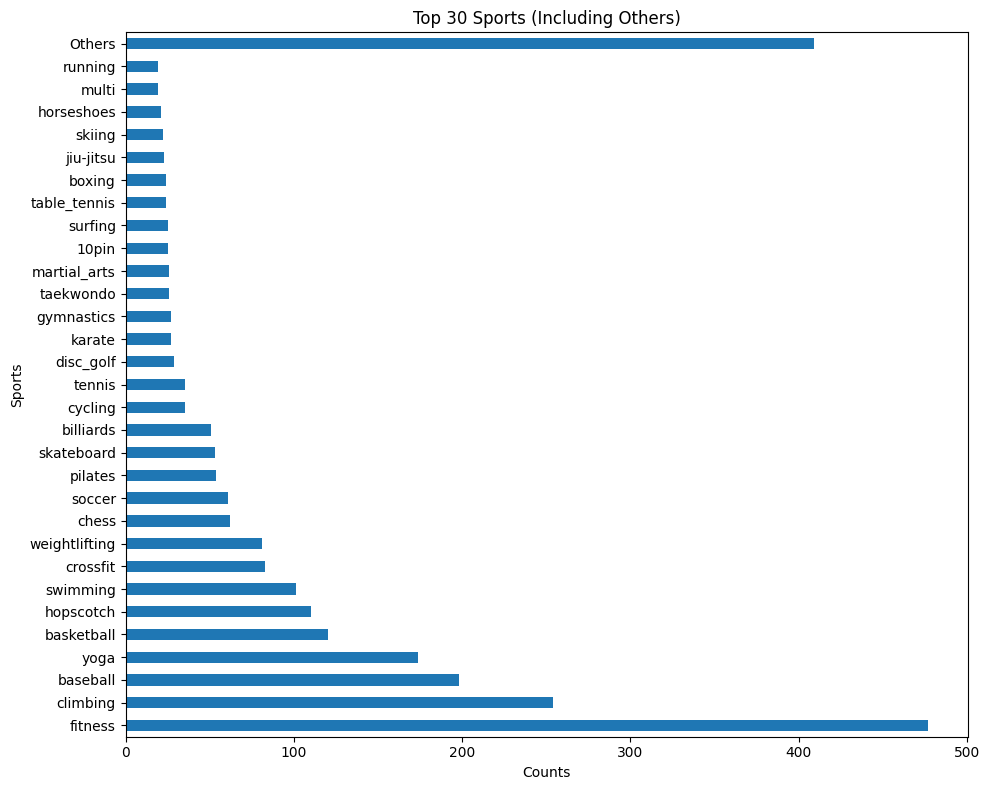

In [72]:
# Assuming you have 'entry_counts' containing the counts of sports
entry_counts = gdf_df['sport'].value_counts()

# Sort the values in descending order
entry_counts_sorted = entry_counts.sort_values(ascending=False)

# Selecting top N sports (e.g., top 20)
top_n = 30
top_sports = entry_counts_sorted.head(top_n)

# Create an 'Others' category for less frequent sports
other_count = entry_counts_sorted.iloc[top_n:].sum()
top_sports['Others'] = other_count

# Plotting the top sports (including 'Others')
plt.figure(figsize=(10, 8))
top_sports.plot(kind='barh')
plt.title(f'Top {top_n} Sports (Including Others)')
plt.xlabel('Counts')
plt.ylabel('Sports')
plt.tight_layout()
plt.show()